In [1]:
BASE_DIR = '../'*3
DATASET_DIR = BASE_DIR+'code/util/dataset/dataset_dummy.ipynb'
EXTMODEL_DIR = BASE_DIR + 'code/CNN/cnn_ext_model/ext_model.ipynb'

In [152]:
%run {DATASET_DIR}
%run {EXTMODEL_DIR}

Using device: cpu
Using PyTorch version: 1.9.0


In [153]:
imagenet = DummyDataset('imagenet', 'select',[3,224,224],1000)

1000


In [61]:
CnnExtModel.set_macro('p24',
    ['serial',
        ['loop', {'repeat':'#repeat'}, ['conv', {'ksize':3, 'chn':'#chn'}]],
        ['max', {'stride':2}]])

CnnExtModel.set_macro('vgg_19',
    ['serial',
        ['custom', {'name':'p24', 'args':{'#repeat':2, '#chn':64}}],
        ['custom', {'name':'p24', 'args':{'#repeat':2, '#chn':128}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':256}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':512}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':512}}],
        ['loop', {'repeat':2}, ['full', {'width':4096}]]])

vgg19 = CnnExtModel('vgg_19', imagenet,
        ['custom', {'name':'vgg_19'}], dump_structure=True)

custom vgg_19
  serial
    custom p24
      serial
        loop
          1: conv, [3, 224, 224]=>[64, 224, 224]pm : 64x3x3x3+64 = 1792
          2: conv, [64, 224, 224]=>[64, 224, 224]pm : 64x64x3x3+64 = 36928
        3: max, [64, 224, 224]=>[64, 112, 112]
p24
vgg_19
    custom p24
      serial
        loop
          4: conv, [64, 112, 112]=>[128, 112, 112]pm : 128x64x3x3+128 = 73856
          5: conv, [128, 112, 112]=>[128, 112, 112]pm : 128x128x3x3+128 = 147584
        6: max, [128, 112, 112]=>[128, 56, 56]
p24
vgg_19
    custom p24
      serial
        loop
          7: conv, [128, 56, 56]=>[256, 56, 56]pm : 256x128x3x3+256 = 295168
          8: conv, [256, 56, 56]=>[256, 56, 56]pm : 256x256x3x3+256 = 590080
          9: conv, [256, 56, 56]=>[256, 56, 56]pm : 256x256x3x3+256 = 590080
          10: conv, [256, 56, 56]=>[256, 56, 56]pm : 256x256x3x3+256 = 590080
        11: max, [256, 56, 56]=>[256, 28, 28]
p24
vgg_19
    custom p24
      serial
        loop
          12: conv, [256,

In [62]:
vgg19.net

[Normal(
   (layer): Sequential(
     (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): ReLU()
     (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
 ),
 Normal(
   (layer): Sequential(
     (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): ReLU()
     (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
 ),
 Normal(
   (layer): Sequential(
     (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): ReLU()
     (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (5): ReLU()
     (6): Conv2d(256, 256, kernel_size=(3, 3), s

In [154]:
CnnExtModel.set_macro('pn',
    ['serial',
        ['conv', {'ksize':3, 'stride':2, 'chn':'#n', 'actions':'#act'}],
        ['loop', {'repeat':'#cnt1'},
                 ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]]])

CnnExtModel.set_macro('plain_34',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['loop', {'repeat':6}, ['conv', {'ksize':3, 'chn':64, 'actions':'#act'}]],
        ['custom', {'name':'pn', 'args':{'#cnt1':7, '#n':128, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':11, '#n':256, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':5, '#n':512, '#act':'#act'}}],
        ['avg', {'stride':7}]])

plain_34 = CnnExtModel('plain_34', imagenet,
       ['custom', {'name':'plain_34', 'args':{'#act':'LA'}}], dump_structure=True)

custom plain_34
  serial
    1: conv, [3, 224, 224]=>[64, 112, 112]pm : 64x3x7x7+64 = 9472
    2: max, [64, 112, 112]=>[64, 56, 56]
    loop
      3: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      4: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      5: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      6: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      7: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      8: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
    custom pn
      serial
        9: conv, [64, 56, 56]=>[128, 28, 28]pm : 128x64x3x3+128 = 73856
        loop
          10: conv, [128, 28, 28]=>[128, 28, 28]pm : 128x128x3x3+128 = 147584
          11: conv, [128, 28, 28]=>[128, 28, 28]pm : 128x128x3x3+128 = 147584
          12: conv, [128, 28, 28]=>[128, 28, 28]pm : 128x128x3x3+128 = 147584
          13: conv, [128, 28, 28]=>[128, 28, 28]pm : 128x128x3x3+128 = 147584
          14: conv, [128, 28, 28]

In [155]:
plain_34.net

[Normal(
   (layer): Sequential(
     (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (4): ReLU()
     (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (6): ReLU()
     (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (8): ReLU()
     (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (10): ReLU()
     (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (12): ReLU()
     (13): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (14): ReLU()
   )
 ),
 Normal(
   (layer): Sequential(
     (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): ReLU()


In [222]:
CnnExtModel.set_macro('rf',
    ['add', {'x':True},
        ['serial', ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}],
                   ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]]])

CnnExtModel.set_macro('rh',
    ['add', {'x':False},
        ['serial', ['conv', {'ksize':3, 'stride':2, 'chn':'#n', 'actions':'#act'}],
                   ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]],
        ['avg', {'stride':2}]])

CnnExtModel.set_macro('rfull',
    ['serial',
        ['loop', {'repeat':'#cnt'},
                 ['custom', {'name':'rf', 'args':{'#n':'#n', '#act':'#act'}}]]])

CnnExtModel.set_macro('rhalf',
    ['serial',
        ['custom', {'name':'rh', 'args':{'#n':'#n', '#act':'#act'}}],
        ['loop', {'repeat':'#cnt1'},
                 ['custom', {'name':'rf', 'args':{'#n':'#n', '#act':'#act'}}]]])

CnnExtModel.set_macro('residual_34',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['custom', {'name':'rfull', 'args':{'#cnt':3, '#n':64, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':3, '#n':128, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':5, '#n':256, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':2, '#n':512, '#act':'#act'}}],
        ['avg', {'stride':7}]])

residual_34 = CnnExtModel('residual_34', imagenet,
    ['custom', {'name':'residual_34', 'args':{'#act':'LA'}}], dump_structure=True)

custom residual_34
  serial
    1: conv, [3, 224, 224]=>[64, 112, 112]pm : 64x3x7x7+64 = 9472
    2: max, [64, 112, 112]=>[64, 56, 56]
    custom rfull
      serial
        loop
          custom rf
            add
              serial
                3: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                4: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
          custom rf
            add
              serial
                5: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                6: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
          custom rf
            add
              serial
                7: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                8: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
    custom rhalf
      serial
        custom rh
          add
            serial
              9: conv, [64, 56, 56]=>[128, 28, 28]pm : 128x64x3x3+128 = 73856
              10: conv, [128, 

In [69]:
residual_34.net

[Normal(
   (layer): Sequential(
     (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
 ),
 rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): ReLU()
   )
   (short): Sequential()
   (relu): ReLU()
 ),
 rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): ReLU()
   )
   (short): Sequential()
   (relu): ReLU()
 ),
 rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): ReLU()
   )
   (short): Seque

In [219]:
%run {DATASET_DIR}
%run {EXTMODEL_DIR}

Using device: cpu
Using PyTorch version: 1.9.0


In [220]:
CnnExtModel.set_macro('bf',
    ['add', {'x':True},
        ['serial',
            ['conv', {'ksize':1, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':1, 'chn':'#n4', 'actions':'#act'}]]])

CnnExtModel.set_macro('bh',
    ['add', {'x':False},
        ['serial',
            ['conv', {'ksize':1, 'stride':2, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':1, 'chn':'#n4', 'actions':'#act'}]],
        ['avg', {'stride':2}]])


CnnExtModel.set_macro('bfull',
    ['serial',
        ['loop', {'repeat':'#cnt'},
            ['custom', {'name':'bf', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}]]])

CnnExtModel.set_macro('bhalf',
    ['serial',
        ['custom', {'name':'bh', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}],
        ['loop', {'repeat':'#cnt1'},
            ['custom', {'name':'bf', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}]]])

CnnExtModel.set_macro('bottleneck_152',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull','args':{'#cnt':3,'#n1':64,'#n4':256,'#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':7,'#n1':128,'#n4':512,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':35,'#n1':256,'#n4':1024,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':2,'#n1':512,'#n4':2048,
            '#act':'#act'}}],
        ['avg', {'stride':7}]])

bottleneck_152 = CnnExtModel('bottleneck_152', imagenet,
        ['custom', {'name':'bottleneck_152', 'args':{'#act':'LAB'}}],
                    dump_structure=True)

custom bottleneck_152
  serial
    1: conv, [3, 224, 224]=>[64, 112, 112]pm : 64x3x7x7+64 = 9472
    2: max, [64, 112, 112]=>[64, 56, 56]
    custom bfull
      serial
        loop
          custom bf
            add
              serial
                3: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x1x1+64 = 4160
                4: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                5: conv, [64, 56, 56]=>[256, 56, 56]pm : 256x64x1x1+256 = 16640
          custom bf
            add
              serial
                6: conv, [256, 56, 56]=>[64, 56, 56]pm : 64x256x1x1+64 = 16448
                7: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                8: conv, [64, 56, 56]=>[256, 56, 56]pm : 256x64x1x1+256 = 16640
          custom bf
            add
              serial
                9: conv, [256, 56, 56]=>[64, 56, 56]pm : 64x256x1x1+64 = 16448
                10: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                11: co

                83: conv, [1024, 14, 14]=>[256, 14, 14]pm : 256x1024x1x1+256 = 262400
                84: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                85: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
          custom bf
            add
              serial
                86: conv, [1024, 14, 14]=>[256, 14, 14]pm : 256x1024x1x1+256 = 262400
                87: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                88: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
          custom bf
            add
              serial
                89: conv, [1024, 14, 14]=>[256, 14, 14]pm : 256x1024x1x1+256 = 262400
                90: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                91: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
          custom bf
            add
              serial
                92: conv, [1024, 14, 14]=>[256, 14, 14]pm 

In [102]:
bottleneck_152.net

[Normal(
   (layer): Sequential(
     (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
     (1): ReLU()
     (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
 ),
 rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (4): ReLU()
     (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (6): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), padding=same)
   )
   (short): Sequential(
     (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
   )
   (relu): ReLU()
 ),
 rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1

In [18]:
# F_DATA_DIR = BASE_DIR+ 'code/util/dataset/flower_prepro.ipynb'

# %run {F_DATA_DIR}

# fd = FlowersDataset([64,64], [3,64,64])

Using device: cpu
Using PyTorch version: 1.9.0


In [223]:
EPOCH = 1
BATCH_SIZE=20
NUM_WORKERS=0
LEARNING_RATE = 0.0001

custom plain_flower
  serial
    1: conv, (3, 64, 64)=>[16, 32, 32]pm : 16x3x7x7+16 = 2368
    2: max, [16, 32, 32]=>[16, 16, 16]
    loop
      3: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
      4: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
      5: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
      6: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
    custom pn
      serial
        7: conv, [16, 16, 16]=>[32, 8, 8]pm : 32x16x3x3+32 = 4640
        loop
          8: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
          9: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
          10: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
pn
    custom pn
      serial
        11: conv, [32, 8, 8]=>[64, 4, 4]pm : 64x32x3x3+64 = 18496
        loop
          12: conv, [64, 4, 4]=>[64, 4, 4]pm : 64x64x3x3+64 = 36928
          13: conv, [64, 4, 4]=>[64, 4, 4]pm : 64x64x3x3+64 = 36928
          14: conv, [64, 4, 4]=>[64, 4, 4]pm : 

    Epoch 1: cost=1.550, accuracy=0.306/0.410 (1/91 secs)
    Epoch 1: cost=1.551, accuracy=0.306/0.340 (2/93 secs)
    Epoch 1: cost=1.549, accuracy=0.308/0.440 (1/94 secs)
    Epoch 1: cost=1.547, accuracy=0.309/0.430 (1/95 secs)
    Epoch 1: cost=1.546, accuracy=0.310/0.430 (1/96 secs)
    Epoch 1: cost=1.543, accuracy=0.313/0.420 (1/97 secs)
    Epoch 1: cost=1.544, accuracy=0.312/0.310 (2/99 secs)
    Epoch 1: cost=1.542, accuracy=0.314/0.370 (1/100 secs)
    Epoch 1: cost=1.542, accuracy=0.315/0.380 (1/101 secs)
    Epoch 1: cost=1.541, accuracy=0.316/0.390 (1/102 secs)
    Epoch 1: cost=1.541, accuracy=0.317/0.380 (1/103 secs)
    Epoch 1: cost=1.539, accuracy=0.319/0.370 (1/104 secs)
    Epoch 1: cost=1.538, accuracy=0.319/0.400 (2/106 secs)
    Epoch 1: cost=1.536, accuracy=0.321/0.420 (1/107 secs)
    Epoch 1: cost=1.534, accuracy=0.322/0.460 (1/108 secs)
    Epoch 1: cost=1.535, accuracy=0.323/0.430 (1/109 secs)
    Epoch 1: cost=1.533, accuracy=0.323/0.440 (1/110 secs)
    

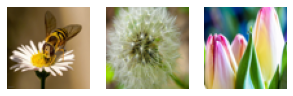

추정확률분포 [11,16,18,24,30] => 추정 tulip : 정답 daisy => X
추정확률분포 [17,45,13,10,15] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [25,19,19,15,21] => 추정 daisy : 정답 tulip => X


In [157]:
CnnExtModel.set_macro('plain_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['loop', {'repeat':4}, ['conv', {'ksize':3, 'chn':16, 'actions':'#act'}]],
        ['custom', {'name':'pn', 'args':{'#cnt1':3, '#n':32, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':3, '#n':64, '#act':'#act'}}],
        ['avg', {'stride':4}]])

plain_flower = CnnExtModel('plain_flower', fd,
        ['custom', {'name':'plain_flower', 'args':{'#act':'LBA'}}],
                    dump_structure=True)

plain_flower.exec_all(epoch_count=EPOCH, report=2, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )
# plain_flower.exec_all(epoch_count=1, report=2)

In [194]:
plain_flower.layers

[rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
     (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (2): ReLU()
     (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
   (rsd2): Sequential(
     (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (2): ReLU()
     (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (5): ReLU()
     (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (8): ReLU()
     (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (10): BatchNorm2d(16, eps=1e-05, mom

custom residual_flower
  serial
    1: conv, (3, 64, 64)=>[16, 32, 32]pm : 16x3x7x7+16 = 2368
    2: max, [16, 32, 32]=>[16, 16, 16]
    custom rfull
      serial
        loop
          custom rf
            add
              serial
                3: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
                4: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
          custom rf
            add
              serial
                5: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
                6: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
    custom rhalf
      serial
        custom rh
          add
            serial
              7: conv, [16, 16, 16]=>[32, 8, 8]pm : 32x16x3x3+32 = 4640
              8: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
            9: avg, [16, 16, 16]=>[16, 8, 8]
        loop
          custom rf
            add
              serial
                10: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 

    Epoch 1: cost=1.551, accuracy=0.319/0.390 (2/90 secs)
    Epoch 1: cost=1.549, accuracy=0.319/0.370 (1/91 secs)
    Epoch 1: cost=1.549, accuracy=0.320/0.270 (2/93 secs)
    Epoch 1: cost=1.547, accuracy=0.323/0.330 (1/94 secs)
    Epoch 1: cost=1.545, accuracy=0.324/0.350 (2/96 secs)
    Epoch 1: cost=1.543, accuracy=0.324/0.390 (2/98 secs)
    Epoch 1: cost=1.542, accuracy=0.325/0.340 (1/99 secs)
    Epoch 1: cost=1.540, accuracy=0.327/0.320 (2/101 secs)
    Epoch 1: cost=1.539, accuracy=0.326/0.330 (1/102 secs)
    Epoch 1: cost=1.538, accuracy=0.327/0.330 (2/104 secs)
    Epoch 1: cost=1.537, accuracy=0.325/0.330 (2/106 secs)
    Epoch 1: cost=1.537, accuracy=0.325/0.350 (1/107 secs)
    Epoch 1: cost=1.534, accuracy=0.326/0.400 (2/109 secs)
    Epoch 1: cost=1.533, accuracy=0.328/0.320 (2/111 secs)
    Epoch 1: cost=1.533, accuracy=0.327/0.400 (1/112 secs)
    Epoch 1: cost=1.532, accuracy=0.327/0.420 (2/114 secs)
    Epoch 1: cost=1.531, accuracy=0.328/0.370 (2/116 secs)
    

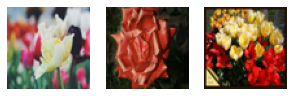

추정확률분포 [32,28,18, 9,14] => 추정 daisy : 정답 tulip => X
추정확률분포 [11,24,19,16,30] => 추정 tulip : 정답 rose => X
추정확률분포 [15,17,17,23,28] => 추정 tulip : 정답 tulip => O


In [224]:
CnnExtModel.set_macro('residual_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['custom', {'name':'rfull', 'args':{'#cnt':2, '#n':16, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':1, '#n':32, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':1, '#n':64, '#act':'#act'}}],
        ['avg', {'stride':4}]])

residual_flower = CnnExtModel('residual_flower', fd,
      ['custom', {'name':'residual_flower', 'args':{'#act':'LBA'}}],
                  dump_structure=True)
residual_flower.exec_all(epoch_count=EPOCH, report=2, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )

custom bottleneck_flower
  serial
    1: conv, (3, 64, 64)=>[16, 32, 32]pm : 16x3x7x7+16 = 2368
    2: max, [16, 32, 32]=>[16, 16, 16]
    custom bfull
      serial
        loop
          custom bf
            add
              serial
                3: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x1x1+16 = 272
                4: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
                5: conv, [16, 16, 16]=>[64, 16, 16]pm : 64x16x1x1+64 = 1088
    custom bhalf
      serial
        custom bh
          add
            serial
              6: conv, [64, 16, 16]=>[32, 8, 8]pm : 32x64x1x1+32 = 2080
              7: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
              8: conv, [32, 8, 8]=>[128, 8, 8]pm : 128x32x1x1+128 = 4224
            9: avg, [64, 16, 16]=>[64, 8, 8]
        loop
          custom bf
            add
              serial
                10: conv, [128, 8, 8]=>[32, 8, 8]pm : 32x128x1x1+32 = 4128
                11: conv, [32, 8, 8]=>[32, 8, 8]pm :

    Epoch 1: cost=1.569, accuracy=0.291/0.370 (3/50 secs)
    Epoch 1: cost=1.560, accuracy=0.299/0.330 (4/54 secs)
    Epoch 1: cost=1.555, accuracy=0.300/0.340 (3/57 secs)
    Epoch 1: cost=1.550, accuracy=0.303/0.300 (3/60 secs)
    Epoch 1: cost=1.552, accuracy=0.299/0.300 (3/63 secs)
    Epoch 1: cost=1.551, accuracy=0.298/0.310 (2/65 secs)
    Epoch 1: cost=1.549, accuracy=0.298/0.330 (4/69 secs)
    Epoch 1: cost=1.553, accuracy=0.295/0.420 (2/71 secs)
    Epoch 1: cost=1.548, accuracy=0.298/0.340 (3/74 secs)
    Epoch 1: cost=1.548, accuracy=0.301/0.350 (4/78 secs)
    Epoch 1: cost=1.546, accuracy=0.303/0.350 (3/81 secs)
    Epoch 1: cost=1.549, accuracy=0.301/0.300 (3/84 secs)
    Epoch 1: cost=1.547, accuracy=0.301/0.370 (3/87 secs)
    Epoch 1: cost=1.546, accuracy=0.301/0.330 (3/90 secs)
    Epoch 1: cost=1.549, accuracy=0.298/0.440 (3/93 secs)
    Epoch 1: cost=1.548, accuracy=0.299/0.400 (3/96 secs)
    Epoch 1: cost=1.545, accuracy=0.300/0.420 (4/100 secs)
    Epoch 1: 

Model bottleneck_flower test report: accuracy = 0.425, (8 secs)

Model bottleneck_flower Visualization


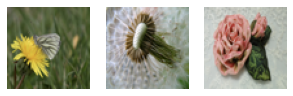

추정확률분포 [19,27,26, 7,21] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [15,20,17,17,30] => 추정 tulip : 정답 dandelion => X
추정확률분포 [14,22,14,22,27] => 추정 tulip : 정답 rose => X


In [225]:
CnnExtModel.set_macro('bottleneck_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull', 'args':{'#cnt':1,'#n1':16,'#n4': 64,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':2,'#n1':32,'#n4':128,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':1,'#n1':64,'#n4':256,
            '#act':'#act'}}],
        ['avg', {'stride':4}]])

bottleneck_flower = CnnExtModel('bottleneck_flower', fd,
    ['custom', {'name':'bottleneck_flower', 'args':{'#act':'LBA'}}],
    dump_structure=True)
bottleneck_flower.exec_all(epoch_count=EPOCH, report=2, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )